In [1]:
import pandas as pd
import numpy as np

In [2]:
text_data = pd.read_csv('C:/Users/admin/Desktop/210603~/210607/ChatbotData.csv', header = 0, sep = ',')

In [3]:
text_data.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


## **형태소 분석**  
  
  

https://liveyourit.tistory.com/56

C:\Users\admin\Anaconda3\Lib\site-packages\konlpy\jvm.py  
{0}{1} 뒤에*표 제거하고 재부팅후 실행

In [4]:
from konlpy.tag import Okt
import re

In [6]:
okt = Okt()
answer_words = okt.morphs(text_data['A'][0])
print(answer_words)

['하루', '가', '또', '가네요', '.']


In [10]:
okt.nouns(text_data['A'][0])

['하루', '또']

In [14]:
okt.pos(text_data['A'][0])

[('하루', 'Noun'),
 ('가', 'Josa'),
 ('또', 'Noun'),
 ('가네요', 'Verb'),
 ('.', 'Punctuation')]

In [16]:
okt.pos(text_data['A'][0] + 'aa' + 'ㅋㅋ')

[('하루', 'Noun'),
 ('가', 'Josa'),
 ('또', 'Noun'),
 ('가네요', 'Verb'),
 ('.', 'Punctuation'),
 ('aa', 'Alpha'),
 ('ㅋㅋ', 'KoreanParticle')]

In [18]:
[word for word, pos in okt.pos(text_data['A'][0] + 'aa' + 'ㅋㅋ') if pos == 'Noun']

['하루', '또']

챗봇데이터의 답변 컬럼에 대해 pos 적용하고 명사만 추출해보자

In [19]:
pos_data = [okt.pos(word) for word in text_data['A']]

In [23]:
pos_data

[[('하루', 'Noun'),
  ('가', 'Josa'),
  ('또', 'Noun'),
  ('가네요', 'Verb'),
  ('.', 'Punctuation')],
 [('위로', 'Noun'), ('해', 'Verb'), ('드립니다', 'Verb'), ('.', 'Punctuation')],
 [('여행', 'Noun'),
  ('은', 'Josa'),
  ('언제나', 'Adverb'),
  ('좋죠', 'Adjective'),
  ('.', 'Punctuation')],
 [('여행', 'Noun'),
  ('은', 'Josa'),
  ('언제나', 'Adverb'),
  ('좋죠', 'Adjective'),
  ('.', 'Punctuation')],
 [('눈살', 'Noun'), ('이', 'Josa'), ('찌푸려지죠', 'Verb'), ('.', 'Punctuation')],
 [('다시', 'Noun'),
  ('새로', 'Adjective'),
  ('사는', 'Verb'),
  ('게', 'Noun'),
  ('마음', 'Noun'),
  ('편해요', 'Adjective'),
  ('.', 'Punctuation')],
 [('다시', 'Noun'),
  ('새로', 'Adjective'),
  ('사는', 'Verb'),
  ('게', 'Noun'),
  ('마음', 'Noun'),
  ('편해요', 'Adjective'),
  ('.', 'Punctuation')],
 [('잘', 'Verb'),
  ('모르고', 'Verb'),
  ('있을', 'Adjective'),
  ('수도', 'Noun'),
  ('있어요', 'Adjective'),
  ('.', 'Punctuation')],
 [('시간', 'Noun'),
  ('을', 'Josa'),
  ('정', 'Noun'),
  ('하고', 'Josa'),
  ('해보세요', 'Verb'),
  ('.', 'Punctuation')],
 [('시간', 'Noun'),
  

1차원 합치기

In [24]:
pos_data_temp = np.sum(pos_data)

In [25]:
pos_data_temp[:20]

[('하루', 'Noun'),
 ('가', 'Josa'),
 ('또', 'Noun'),
 ('가네요', 'Verb'),
 ('.', 'Punctuation'),
 ('위로', 'Noun'),
 ('해', 'Verb'),
 ('드립니다', 'Verb'),
 ('.', 'Punctuation'),
 ('여행', 'Noun'),
 ('은', 'Josa'),
 ('언제나', 'Adverb'),
 ('좋죠', 'Adjective'),
 ('.', 'Punctuation'),
 ('여행', 'Noun'),
 ('은', 'Josa'),
 ('언제나', 'Adverb'),
 ('좋죠', 'Adjective'),
 ('.', 'Punctuation'),
 ('눈살', 'Noun')]

In [26]:
pos_data_nouns = [word for word, _ in pos_data_temp if _ == 'Noun']  ## 명사만 추출

In [27]:
pos_data_nouns

['하루',
 '또',
 '위로',
 '여행',
 '여행',
 '눈살',
 '다시',
 '게',
 '마음',
 '다시',
 '게',
 '마음',
 '수도',
 '시간',
 '정',
 '시간',
 '정',
 '자랑',
 '자리',
 '요',
 '그',
 '사람',
 '거',
 '그',
 '사람',
 '거',
 '혼자',
 '돈',
 '다시',
 '거',
 '땀',
 '어서',
 '출발',
 '집',
 '집',
 '다음',
 '달',
 '더',
 '절약',
 '다음',
 '달',
 '더',
 '절약',
 '가장',
 '시간',
 '오늘이',
 '어제',
 '내일',
 '고민',
 '시간',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '저',
 '준',
 '사람',
 '부모님',
 '저',
 '이야기',
 '사람',
 '친구',
 '생각',
 '저',
 '준',
 '사람',
 '부모님',
 '저',
 '이야기',
 '사람',
 '친구',
 '생각',
 '더',
 '기회',
 '도',
 '이야기',
 '시간',
 '이야기',
 '시간',
 '온',
 '가족',
 '모두',
 '마음',
 '곳',
 '생각',
 '더',
 '기회',
 '저',
 '준',
 '사람',
 '부모님',
 '저',
 '이야기',
 '사람',
 '친구',
 '생각',
 '생각',
 '정말',
 '후회',
 '습관',
 '결정',
 '리지',
 '선생님',
 '기관',
 '연락',
 '감정',
 '그',
 '자체',
 '득템',
 '휴식',
 '단',
 '두',
 '개',
 '진리',
 '단',
 '두',
 '개',
 '진리',
 '저',
 '가세',
 '가세',
 '병원',
 '가세',
 '때',
 '게',
 '때',
 '게',
 '때',
 '게',
 '관리',
 '병원',
 '가세',
 '병원',
 '가세',
 '저',
 '자신',
 '더',
 '사랑',
 '

In [28]:
pos_data_nouns_len2 = [word for word in pos_data_nouns if len(word) >= 2]

In [29]:
pos_data_nouns_len2

['하루',
 '위로',
 '여행',
 '여행',
 '눈살',
 '다시',
 '마음',
 '다시',
 '마음',
 '수도',
 '시간',
 '시간',
 '자랑',
 '자리',
 '사람',
 '사람',
 '혼자',
 '다시',
 '어서',
 '출발',
 '다음',
 '절약',
 '다음',
 '절약',
 '가장',
 '시간',
 '오늘이',
 '어제',
 '내일',
 '고민',
 '시간',
 '가족',
 '모두',
 '마음',
 '가족',
 '모두',
 '마음',
 '가족',
 '모두',
 '마음',
 '사람',
 '부모님',
 '이야기',
 '사람',
 '친구',
 '생각',
 '사람',
 '부모님',
 '이야기',
 '사람',
 '친구',
 '생각',
 '기회',
 '이야기',
 '시간',
 '이야기',
 '시간',
 '가족',
 '모두',
 '마음',
 '생각',
 '기회',
 '사람',
 '부모님',
 '이야기',
 '사람',
 '친구',
 '생각',
 '생각',
 '정말',
 '후회',
 '습관',
 '결정',
 '리지',
 '선생님',
 '기관',
 '연락',
 '감정',
 '자체',
 '득템',
 '휴식',
 '진리',
 '진리',
 '가세',
 '가세',
 '병원',
 '가세',
 '관리',
 '병원',
 '가세',
 '병원',
 '가세',
 '자신',
 '사랑',
 '습관',
 '습관',
 '생각',
 '마음',
 '관계',
 '변화',
 '처음',
 '당신',
 '매력',
 '어필',
 '먼저',
 '생활',
 '패턴',
 '먼저',
 '생활',
 '패턴',
 '혼자',
 '연인',
 '시간',
 '질질',
 '서로',
 '개시',
 '개시',
 '방학',
 '방학',
 '세수',
 '그게',
 '제일',
 '건데',
 '그게',
 '제일',
 '건데',
 '다음',
 '공적',
 '공적',
 '낮잠',
 '잠깐',
 '자도',
 '친구',
 '당신',
 '당신',
 '사람',
 '사람',
 '친구',
 '선의',
 '거짓말',
 '거짓말',
 

## **WordCloud**  
pip install wordcloud

In [30]:
from wordcloud import WordCloud

In [31]:
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).\
generate(' '.join(pos_data_nouns_len2))

In [33]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

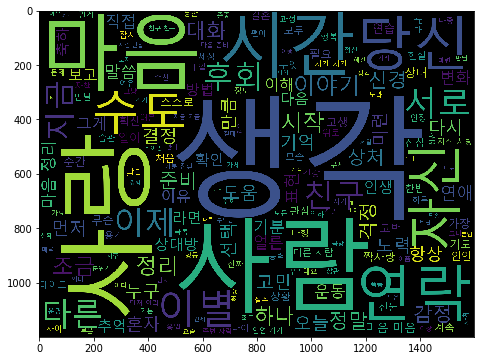

In [45]:
plt.figure(figsize = (12,6))
plt.imshow(wordcloud)
plt.show

In [39]:
from PIL import Image

In [41]:
mask = np.array(Image.open('C:/Users/admin/Desktop/210603~/210607/korea.jpg'))

In [43]:
mask.shape

(2560, 1664, 3)

In [44]:
wordcloud2 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                      colormap = 'viridis', background_color = 'white',
                      mask = mask).\
generate(' '.join(pos_data_nouns_len2))

<function matplotlib.pyplot.show(*args, **kw)>

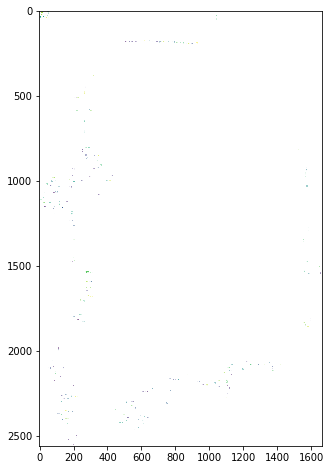

In [51]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud2)
plt.show

In [53]:
mask2 = np.array(Image.open('C:/Users/admin/Desktop/210603~/210607/italy.png'))

In [55]:
wordcloud3 = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                      colormap = 'viridis', background_color = 'white',
                      mask = mask2).\
generate(' '.join(pos_data_nouns_len2))

<function matplotlib.pyplot.show(*args, **kw)>

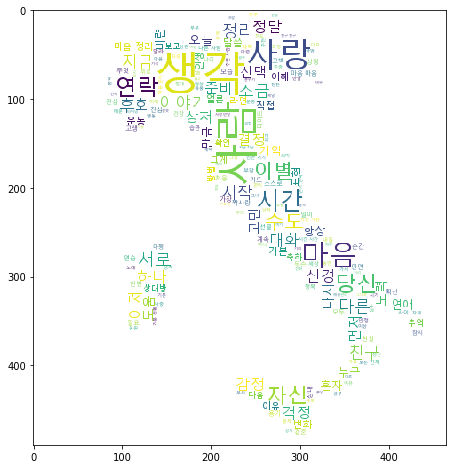

In [57]:
plt.figure(figsize = (12,8))
plt.imshow(wordcloud3)
plt.show

# **0607 연습문제**

### **1. 위 파일을 불러와서 텍스트 부분만 남기는 전처리 진행**

### **2. 텍스트 데이터로 워드클라우드 생성**

In [93]:
import pandas as pd

In [98]:
f = open('C:/Users/admin/Desktop/210603~/210607/seoul.txt', 'r', encoding = 'utf-8')

In [99]:
text = f.readlines()

In [102]:
from konlpy.tag import Okt

In [107]:
okt.pos(text[0])

[('\ufeff', 'Foreign'),
 ('3082', 'Number'),
 ('박원순', 'Noun'),
 ('시장님', 'Noun'),
 ('께', 'Josa'),
 ('2018-03', 'Number'),
 ('-', 'Punctuation'),
 ('2751', 'Number'),
 ('\n', 'Foreign')]

In [108]:
pos_text = [okt.pos(word) for word in text]

In [109]:
pos_text

[[('\ufeff', 'Foreign'),
  ('3082', 'Number'),
  ('박원순', 'Noun'),
  ('시장님', 'Noun'),
  ('께', 'Josa'),
  ('2018-03', 'Number'),
  ('-', 'Punctuation'),
  ('2751', 'Number'),
  ('\n', 'Foreign')],
 [('3081', 'Number'),
  ('장위', 'Noun'),
  ('7', 'Number'),
  ('구역', 'Noun'),
  ('재개발', 'Noun'),
  ('현금', 'Noun'),
  ('청산', 'Noun'),
  ('자', 'Suffix'),
  ('딸', 'Noun'),
  ('입니다', 'Adjective'),
  ('...', 'Punctuation'),
  ('2018-03', 'Number'),
  ('-', 'Punctuation'),
  ('2711', 'Number'),
  ('\n', 'Foreign')],
 [('3080', 'Number'),
  ('미세먼지', 'Noun'),
  ('에', 'Josa'),
  ('대하', 'Noun'),
  ('여', 'Josa'),
  ('2018-03', 'Number'),
  ('-', 'Punctuation'),
  ('2615', 'Number'),
  ('\n', 'Foreign')],
 [('3079', 'Number'),
  ('목동', 'Noun'),
  ('1', 'Number'),
  (',', 'Punctuation'),
  ('2', 'Number'),
  (',', 'Punctuation'),
  ('3', 'Number'),
  ('단지', 'Noun'),
  ('환원', 'Noun'),
  ('2018-03', 'Number'),
  ('-', 'Punctuation'),
  ('2617', 'Number'),
  ('\n', 'Foreign')],
 [('3078', 'Number'),
  ('강동구', '

In [110]:
pos_text_temp = np.sum(pos_text) ## 1차원 합치기

In [112]:
pos_text_nouns = [word for word, _ in pos_text_temp if _ == 'Noun']  ## 명사만 추출

In [113]:
pos_text_nouns

['박원순',
 '시장님',
 '장위',
 '구역',
 '재개발',
 '현금',
 '청산',
 '딸',
 '미세먼지',
 '대하',
 '목동',
 '단지',
 '환원',
 '강동구',
 '둔촌',
 '아파트',
 '재건축',
 '관련',
 '안',
 '성수',
 '지구',
 '건축',
 '심의',
 '관련',
 '정정',
 '보도',
 '미세먼지',
 '대안',
 '제안',
 '서울',
 '개인',
 '택시',
 '주',
 '무제',
 '제안',
 '성수',
 '전략',
 '정비',
 '구역',
 '사업',
 '지연',
 '사유',
 '확인',
 '개포',
 '공',
 '단지',
 '아파트',
 '기간',
 '이내',
 '조기',
 '시장님',
 '해소',
 '성수',
 '전략',
 '정비',
 '구역',
 '지구',
 '건축',
 '심의',
 '정정',
 '수색',
 '관문',
 '개발',
 '철도',
 '물류',
 '기지',
 '서울시장',
 '목동',
 '단지',
 '종',
 '환원',
 '시',
 '합동',
 '보고',
 '회',
 '시장님',
 '목동',
 '주민',
 '대표',
 '만남',
 '목동',
 '단지',
 '종',
 '환원',
 '문제',
 '해결',
 '조건',
 '목동',
 '단지',
 '종환',
 '조건',
 '목동',
 '단지',
 '종환',
 '목동',
 '종',
 '환원',
 '목동',
 '주민',
 '대표',
 '박원순',
 '시장님',
 '습',
 '목동',
 '단지',
 '종',
 '환원',
 '시구',
 '합동',
 '보고',
 '회',
 '목동',
 '단지',
 '종',
 '환원',
 '목동',
 '단지',
 '종',
 '환원',
 '촉구',
 '목동',
 '단지',
 '종',
 '환원',
 '목동',
 '단지',
 '주민',
 '시장님',
 '면담',
 '요청',
 '안정',
 '검토',
 '고속도로',
 '목동',
 '단지',
 '주민',
 '특혜',
 '합동',
 '보고',
 '회',
 '촉구',
 '종',
 '환

In [114]:
pos_text_nouns_len2 = [word for word in pos_text_nouns if len(word) >= 2] ## 길이 2이상

In [115]:
pos_text_nouns_len2

['박원순',
 '시장님',
 '장위',
 '구역',
 '재개발',
 '현금',
 '청산',
 '미세먼지',
 '대하',
 '목동',
 '단지',
 '환원',
 '강동구',
 '둔촌',
 '아파트',
 '재건축',
 '관련',
 '성수',
 '지구',
 '건축',
 '심의',
 '관련',
 '정정',
 '보도',
 '미세먼지',
 '대안',
 '제안',
 '서울',
 '개인',
 '택시',
 '무제',
 '제안',
 '성수',
 '전략',
 '정비',
 '구역',
 '사업',
 '지연',
 '사유',
 '확인',
 '개포',
 '단지',
 '아파트',
 '기간',
 '이내',
 '조기',
 '시장님',
 '해소',
 '성수',
 '전략',
 '정비',
 '구역',
 '지구',
 '건축',
 '심의',
 '정정',
 '수색',
 '관문',
 '개발',
 '철도',
 '물류',
 '기지',
 '서울시장',
 '목동',
 '단지',
 '환원',
 '합동',
 '보고',
 '시장님',
 '목동',
 '주민',
 '대표',
 '만남',
 '목동',
 '단지',
 '환원',
 '문제',
 '해결',
 '조건',
 '목동',
 '단지',
 '종환',
 '조건',
 '목동',
 '단지',
 '종환',
 '목동',
 '환원',
 '목동',
 '주민',
 '대표',
 '박원순',
 '시장님',
 '목동',
 '단지',
 '환원',
 '시구',
 '합동',
 '보고',
 '목동',
 '단지',
 '환원',
 '목동',
 '단지',
 '환원',
 '촉구',
 '목동',
 '단지',
 '환원',
 '목동',
 '단지',
 '주민',
 '시장님',
 '면담',
 '요청',
 '안정',
 '검토',
 '고속도로',
 '목동',
 '단지',
 '주민',
 '특혜',
 '합동',
 '보고',
 '촉구',
 '환원',
 '합동',
 '보고',
 '조건',
 '목동',
 '단지',
 '종환',
 '조건',
 '목동',
 '단지',
 '종환',
 '시장님',
 '우리',
 '대표',
 '목동',

<function matplotlib.pyplot.show(*args, **kw)>

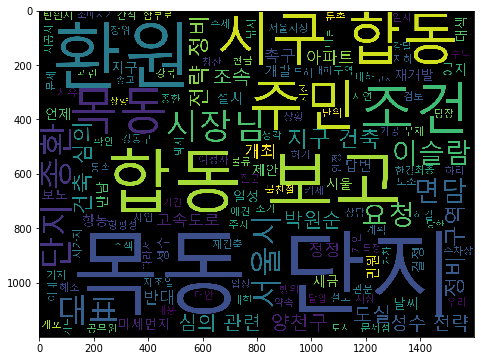

In [123]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path = 'c:/windows/fonts/malgun.ttf',
                     width = 1600, height = 1200).generate(' '.join(pos_text_nouns_len2))
import matplotlib.pyplot as plt
plt.figure(figsize = (12,6))
plt.imshow(wordcloud)
plt.show